# Course 9 - Applied Data Science Capstone - Final Project

## Problem
My project's goal is to help create a tour guide for the city of Jeruslam, Israel. <br>
My goal is to cluster the venues in the city into categories and help someone that don't know this city very well to enjoy the trip to the fullest. <br>
It can be useful to Jerusalem city council, tourists and to travel guides.

## Data
The data I will be using is the data of the venues in Jerusalem. <br> I will be going to cluster the venues using the category. The source of the data is Foursquare.

## Methodlogy
This is the main part of the notebook. <br>
Here we will get the data and analyze it.

In [16]:
#First, we will import all the libraries we will need.

import numpy as np #library for arithmetic calculation
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests
import json

<br> First, we will get the information about all the vanues in Jerusalem.
In order to get this data, we will use the 'explore' command in the Foursquare API. <br>

In [17]:
#User API credentials
client_id = ''
client_secret = ''
version = 20210101

#Jerusalem coordinates
j_lat=31.771959
j_lon=35.217018

In [18]:
#Define url for the request
radius=2000
limit=200
url = 'http://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(client_id,
                                                                                                                          client_secret,
                                                                                                                          version,
                                                                                                                          j_lat,
                                                                                                                          j_lon,
                                                                                                                          radius,
                                                                                                                          limit)

In [19]:
#Request the data using the Foursquare API
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff2023e4536486d2a5a28bc'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jerusalem',
  'headerFullLocation': 'Jerusalem',
  'headerLocationGranularity': 'city',
  'totalResults': 167,
  'suggestedBounds': {'ne': {'lat': 31.789959018000015,
    'lng': 35.23815121132177},
   'sw': {'lat': 31.753958981999983, 'lng': 35.195884788678235}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b6dcf09f964a520e0912ce3',
       'name': 'King David Hotel Jerusalem',
       'location': {'address': '23 King David St',
        'lat': 31.774343600095825,
        'lng': 35.22236809789485,
        'labeledLatLngs': [{'label': 'display',
          'lat': 31.77434

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
#Now let's clean the json and put the data into dataframe

venues = results['response']['groups'][0]['items']
    
raw_nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =raw_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,King David Hotel Jerusalem,Hotel,31.774344,35.222368
1,Café Yehoshua (קפה יהושע),Café,31.772894,35.214717
2,Talbia Wine Bar,Wine Bar,31.768507,35.215987
3,Hansen House (בית הנסן),Community Center,31.767722,35.216951
4,Independence Park (גן העצמאות),Park,31.777131,35.219459


In [22]:
# Let's see how many venues we got
nearby_venues.shape

(100, 4)

We got nice dataframe of 100 rows, one row for each venue.

In [23]:
#Remove none or 'None' values if exists
nearby_venues.dropna().shape

(100, 4)

OK, there are no none or 'None' values. <br>
We can see the full data frame, in order to check it manually:

In [24]:
print(nearby_venues.to_string())

                                                   name                 categories        lat        lng
0                            King David Hotel Jerusalem                      Hotel  31.774344  35.222368
1                             Café Yehoshua (קפה יהושע)                       Café  31.772894  35.214717
2                                       Talbia Wine Bar                   Wine Bar  31.768507  35.215987
3                               Hansen House (בית הנסן)           Community Center  31.767722  35.216951
4                        Independence Park (גן העצמאות)                       Park  31.777131  35.219459
5                                      HaPa'amon Garden                       Park  31.770609  35.223155
6                             Waldorf Astoria Jerusalem                      Hotel  31.777553  35.221754
7                                         Cafe Agronsky                       Café  31.776951  35.220538
8                                 Montefiore's Windmill

This was the first output - list of venues in the city, with their categories. <br>
In addition, we can derive more data from this dataframe, for example, we can show how the venues' categories are distributed.

In [25]:
# Let's create a dataframe of categories of the venues along with their frequency

dist_veneus = nearby_venues['categories'].value_counts().to_frame().reset_index()

dist_veneus.rename(columns={'index': 'Category', 'categories': 'number of times' }, inplace=True)


In [26]:
dist_veneus

,Category,number of times
0,Café,10
1,Hotel,9
2,Bar,5
3,Middle Eastern Restaurant,5
4,Park,4
5,Historic Site,4
6,Pizza Place,3
7,Mediterranean Restaurant,3
8,Burger Joint,3
9,History Museum,3


We can see that there are a lot of categories. <br>
In order to see the trend, let's remove all the categories that appear less then 3 times and display a pie chart.

In [27]:
dist_venues_3 = dist_veneus[dist_veneus['number of times'] > 2]

dist_venues_3

,Category,number of times
0,Café,10
1,Hotel,9
2,Bar,5
3,Middle Eastern Restaurant,5
4,Park,4
5,Historic Site,4
6,Pizza Place,3
7,Mediterranean Restaurant,3
8,Burger Joint,3
9,History Museum,3


In [28]:
#List of categories
labels_ = dist_venues_3['Category'].tolist()
labels_

['Café',
 'Hotel',
 'Bar',
 'Middle Eastern Restaurant',
 'Park',
 'Historic Site',
 'Pizza Place',
 'Mediterranean Restaurant',
 'Burger Joint',
 'History Museum',
 'Restaurant',
 'Plaza']

<AxesSubplot:title={'center':'Venues Categories Distribution in Jerusalem'}>

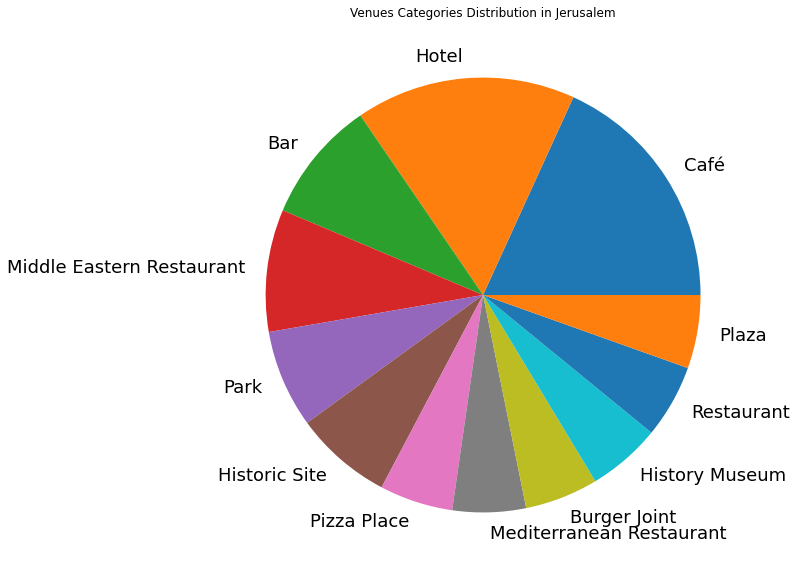

In [31]:
dist_venues_3.plot.pie(y='number of times',
                      figsize=(10,10),
                       title='Venues Categories Distribution in Jerusalem',
                      legend=False,
                      labels=labels_,
                      ylabel='',
                      fontsize=18)

This gives a quick view of what someone can do in Jerusalem!